In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [7]:
if os.path.isfile("city_pairs.csv"):
    filepath = "city_pairs.csv"
    print("loading from file")
else:
    filepath = "https://data.gov.au/data/dataset/d9fbffaa-836f-4f52-80e8-324249ff269f/resource/ebcafd83-9514-4f72-a995-fe7ee90cb9da/download/city_pairs.csv"
    print("loading from the internet")

airport_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [8]:
airport_data.head(10)

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
5,31048,Adelaide,Muscat,Oman,17,0.000,0.000,14,0.100,0.000,31,0.100,0.000,1985,1
6,31048,Adelaide,Rome,Italy,79,0.005,0.000,44,0.000,0.000,123,0.005,0.000,1985,1
7,31048,Adelaide,Singapore,Singapore,2496,37.345,0.000,2037,133.203,0.112,4533,170.548,0.112,1985,1
8,31048,Brisbane,Abu Dhabi,United Arab Emirates,0,0.000,0.000,3,0.000,0.000,3,0.000,0.000,1985,1
9,31048,Brisbane,Auckland,New Zealand,7157,223.258,0.671,5652,33.032,3.218,12809,256.290,3.889,1985,1


In [9]:
airport_data.columns

Index(['Month', 'AustralianPort', 'ForeignPort', 'Country', 'Passengers_In',
       'Freight_In_(tonnes)', 'Mail_In_(tonnes)', 'Passengers_Out',
       'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)', 'Passengers_Total',
       'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)', 'Year', 'Month_num'],
      dtype='object')

In [10]:
row_one = airport_data.iloc[1]
row_one

Month                        31048
AustralianPort            Adelaide
ForeignPort                Bahrain
Country                    Bahrain
Passengers_In                   12
Freight_In_(tonnes)              0
Mail_In_(tonnes)                 0
Passengers_Out                   5
Freight_Out_(tonnes)         0.033
Mail_Out_(tonnes)                0
Passengers_Total                17
Freight_Total_(tonnes)       0.033
Mail_Total_(tonnes)              0
Year                          1985
Month_num                        1
Name: 1, dtype: object

In [11]:
airport_data["Passengers_Total"]

0        2498
1          17
2          12
3         286
4        3039
         ... 
81396     571
81397    1273
81398       0
81399    1404
81400       0
Name: Passengers_Total, Length: 81401, dtype: int64

monthly average passenger and freight quantity in the past 5 years

In [112]:
a = airport_data["Passengers_Total"][airport_data["Year"] == 2016]
a1 = a.sum()
b = airport_data["Passengers_Total"][airport_data["Year"] == 2017]
b1 = b.sum()
c = airport_data["Passengers_Total"][airport_data["Year"] == 2018]
c1 = c.sum()
d = airport_data["Passengers_Total"][airport_data["Year"] == 2019]
d1 = d.sum()
e = airport_data["Passengers_Total"][airport_data["Year"] == 2020]
e1 = e.sum()
ave_ms1 = [a1/12, b1/12, c1/12, d1/12, e1/5]

al= airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2016]
al1 = al.sum()
br = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2017]
br1 = br.sum()
ch = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2018]
ch1 = ch.sum()
de = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2019]
de1 = de.sum()
ec = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020]
ec1 = ec.sum()

ave_ms2 = [al1/12, br1/12, ch1/12, de1/12, ec1/5]

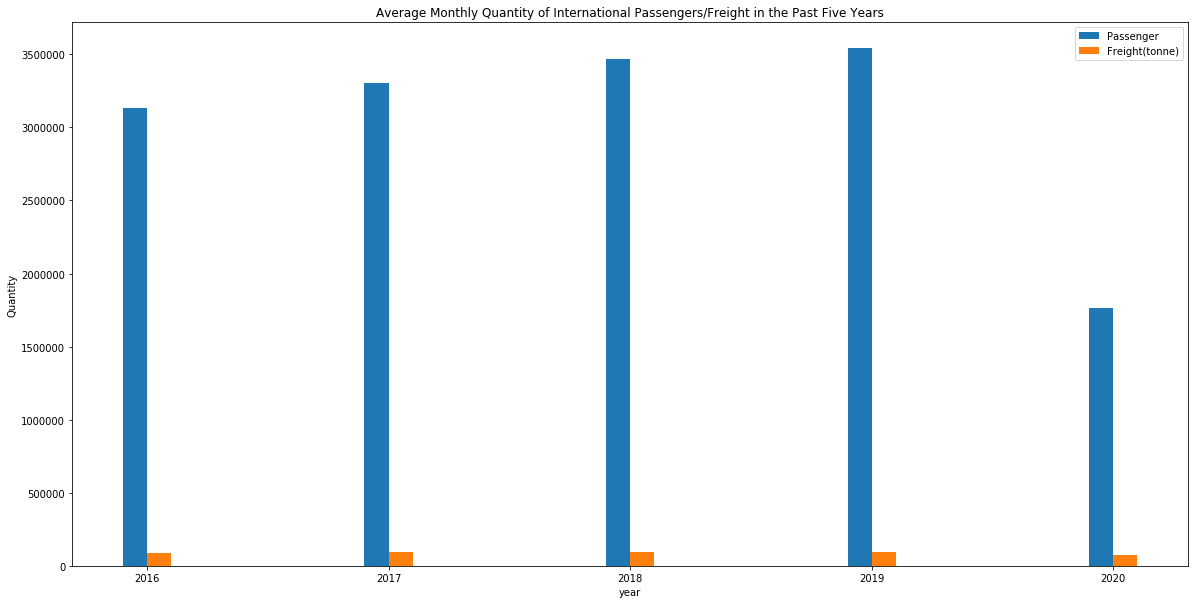

In [114]:
indxx = np.arange(len(ave_ms1))
bar_width = 0.1
indx_mxx = ["2016", "2017", "2018", "2019", "2020"]

fig, ax = plt.subplots()
pass1 = ax.bar(indxx - bar_width/2, ave_ms1, bar_width, label='Passenger')
fre1 = ax.bar(indxx + bar_width/2, ave_ms2, bar_width, label='Freight(tonne)')

ax.set_xticks(indxx)
ax.set_xticklabels(indx_mxx)

plt.xlabel("year")
plt.ylabel("Quantity")
plt.title("Average Monthly Quantity of International Passengers/Freight in the Past Five Years")

ax.legend()

plt.show()

2020, Passenger vs Freight

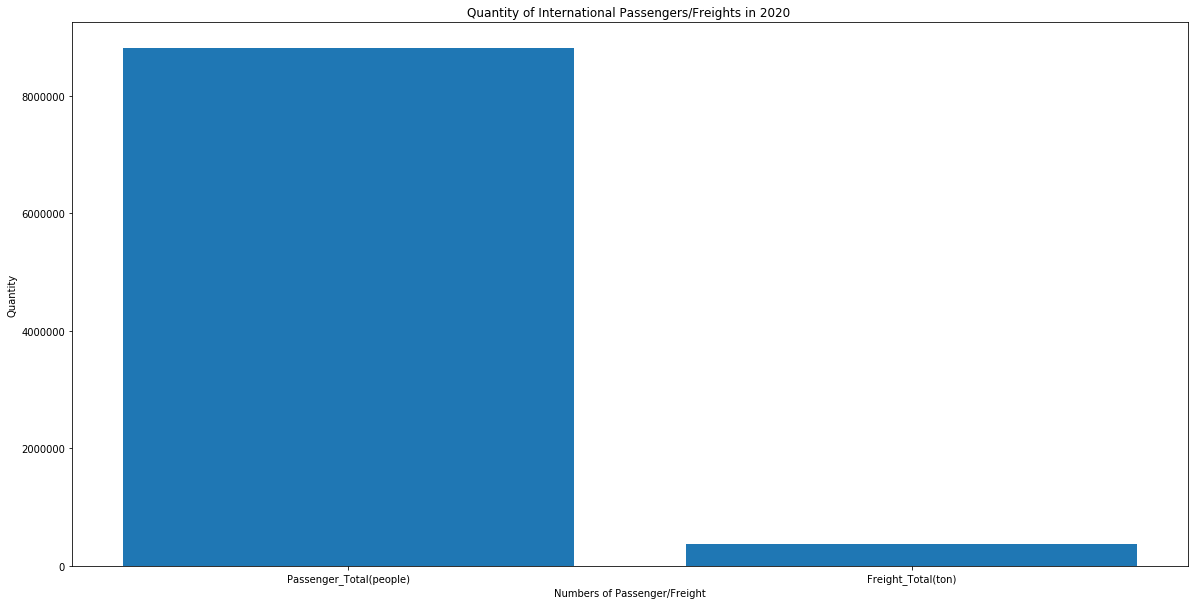

In [209]:
s_pa = airport_data["Passengers_Total"][airport_data["Year"] == 2020]
Pa_2020 = s_pa.sum()
s_fr = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020]
Fr_2020 = s_fr.sum()

x_axis = ["Passenger_Total(people)", "Freight_Total(ton)"]
y_axis = [Pa_2020, Fr_2020]

ind = np.arange(len(x_axis))
plt.bar(ind, y_axis)
plt.xticks(ind, x_axis)

plt.xlabel("Numbers of Passenger/Freight")
plt.ylabel("Quantity")
plt.title("Quantity of International Passengers/Freights in 2020 ")
plt.show()

2020, Passenger vs freight in different months

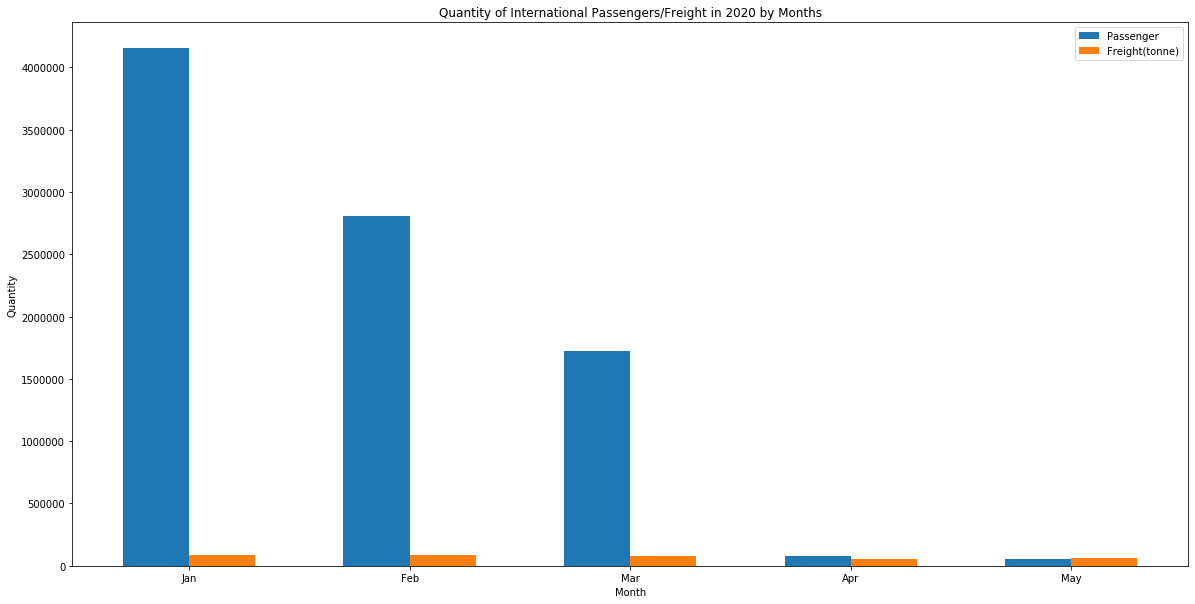

In [76]:
Pass_ms = []
for i in range(1,6):
    s_paa = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i]
    s_2020pm = s_paa.sum()
    Pass_ms.append(s_2020pm)
    
Fre_ms = []
for ii in range(1,6):
    s_frr = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == ii]
    s_2020fm = s_frr.sum()
    Fre_ms.append(s_2020fm)

indx = np.arange(len(Pass_ms))
bar_width = 0.3
indx_mx = ["Jan", "Feb", "Mar", "Apr", "May"]

fig, ax = plt.subplots()
barpass = ax.bar(indx - bar_width/2, Pass_ms, bar_width, label='Passenger')
barfre = ax.bar(indx + bar_width/2, Fre_ms, bar_width, label='Freight(tonne)')

ax.set_xticks(indx)
ax.set_xticklabels(indx_mx)

plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Quantity of International Passengers/Freight in 2020 by Months")

ax.legend()

plt.show()

2020 internatioanl passengers in major airports by months

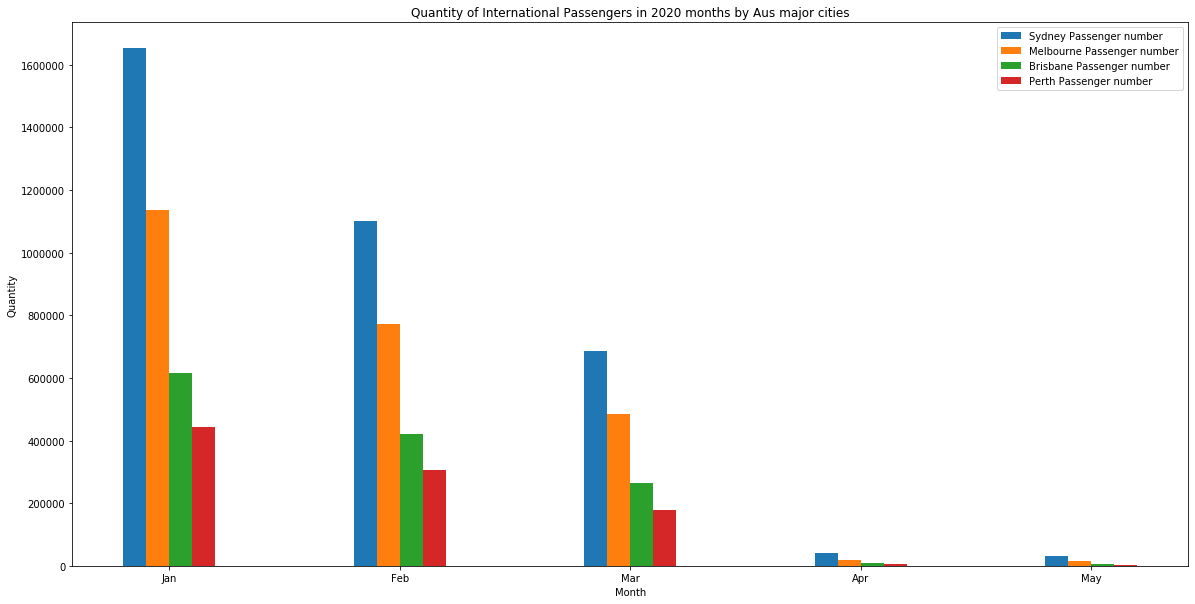

In [117]:
Syd_pass = []
for i in range(1,6):
    Syd_ms_pass = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Sydney"]
    s_Syd_ms_pass = Syd_ms_pass.sum()
    Syd_pass.append(s_Syd_ms_pass)

Mel_pass = []
for i in range(1,6):
    Mel_ms_pass = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Melbourne"]
    s_Mel_ms_pass = Mel_ms_pass.sum()
    Mel_pass.append(s_Mel_ms_pass)

Bri_pass = []
for i in range(1,6):
    Bri_ms_pass = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Brisbane"]
    s_Bri_ms_pass = Bri_ms_pass.sum()
    Bri_pass.append(s_Bri_ms_pass)

Per_pass = []
for i in range(1,6):
    Per_ms_pass = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Perth"]
    s_Per_ms_pass = Per_ms_pass.sum()
    Per_pass.append(s_Per_ms_pass)

indx1 = np.arange(len(Syd_pass))
bar_width1 = 0.1
indx_mx1 = ["Jan", "Feb", "Mar", "Apr", "May"]

fig, ax = plt.subplots()
syd = ax.bar(indx1 - 3/2 * bar_width1, Syd_pass, bar_width1, label='Sydney Passenger number')
mel = ax.bar(indx1 - bar_width1/2, Mel_pass, bar_width1, label='Melbourne Passenger number')
bri = ax.bar(indx1 + bar_width1/2, Bri_pass, bar_width1, label='Brisbane Passenger number')
per = ax.bar(indx1 + 3/2 * bar_width1, Per_pass, bar_width1, label='Perth Passenger number')

ax.set_xticks(indx1)
ax.set_xticklabels(indx_mx1)

plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Quantity of International Passengers in 2020 months by Aus major cities")

ax.legend()

plt.show()

International freight quantity by months in major airports

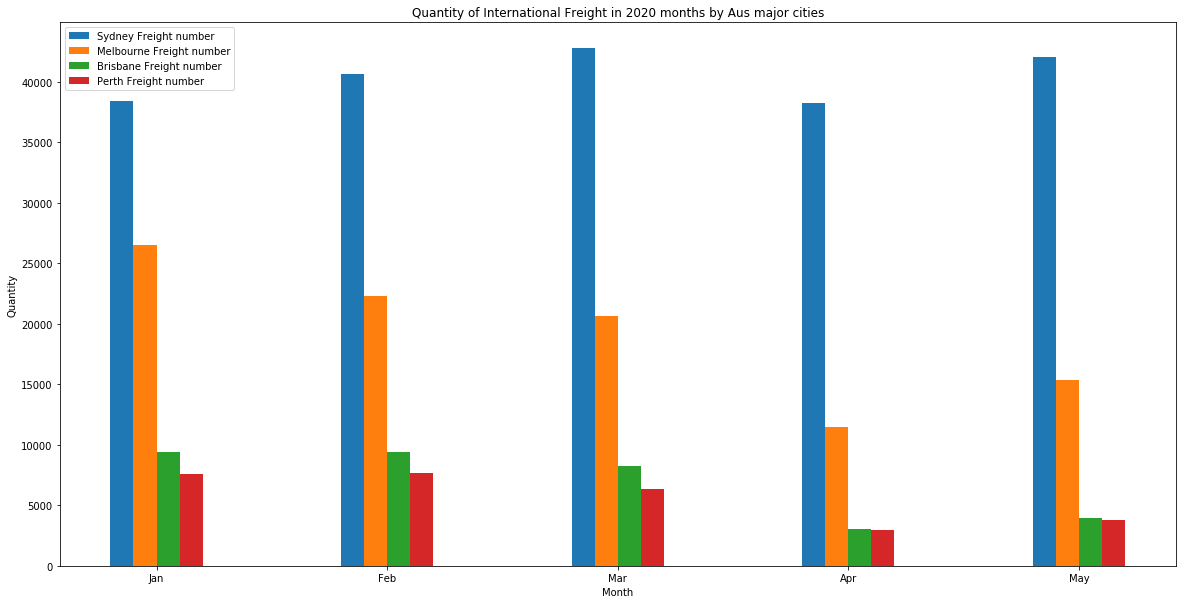

In [187]:
Syd_fre = []
for i in range(1,6):
    Syd_ms_fre = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Sydney"]
    s_Syd_ms_fre = Syd_ms_fre.sum()
    Syd_fre.append(s_Syd_ms_fre)

Mel_fre = []
for i in range(1,6):
    Mel_ms_fre = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Melbourne"]
    s_Mel_ms_fre = Mel_ms_fre.sum()
    Mel_fre.append(s_Mel_ms_fre)

Bri_fre = []
for i in range(1,6):
    Bri_ms_fre = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Brisbane"]
    s_Bri_ms_fre = Bri_ms_fre.sum()
    Bri_fre.append(s_Bri_ms_fre)

Per_fre = []
for i in range(1,6):
    Per_ms_fre = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Perth"]
    s_Per_ms_fre = Per_ms_fre.sum()
    Per_fre.append(s_Per_ms_fre)

indx2 = np.arange(len(Syd_fre))
bar_width2 = 0.1
indx_mx2 = ["Jan", "Feb", "Mar", "Apr", "May"]

fig, ax = plt.subplots()
syd = ax.bar(indx2 - 3/2 * bar_width2, Syd_fre, bar_width2, label='Sydney Freight number')
mel = ax.bar(indx2 - bar_width2/2, Mel_fre, bar_width2, label='Melbourne Freight number')
bri = ax.bar(indx2 + bar_width2/2, Bri_fre, bar_width2, label='Brisbane Freight number')
per = ax.bar(indx2 + 3/2 * bar_width2, Per_fre, bar_width2, label='Perth Freight number')

ax.set_xticks(indx2)
ax.set_xticklabels(indx_mx2)

plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Quantity of International Freight in 2020 months by Aus major cities")

ax.legend()

plt.show()

In [39]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

In [47]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


# _fin_